In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set style for clean visualizations
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

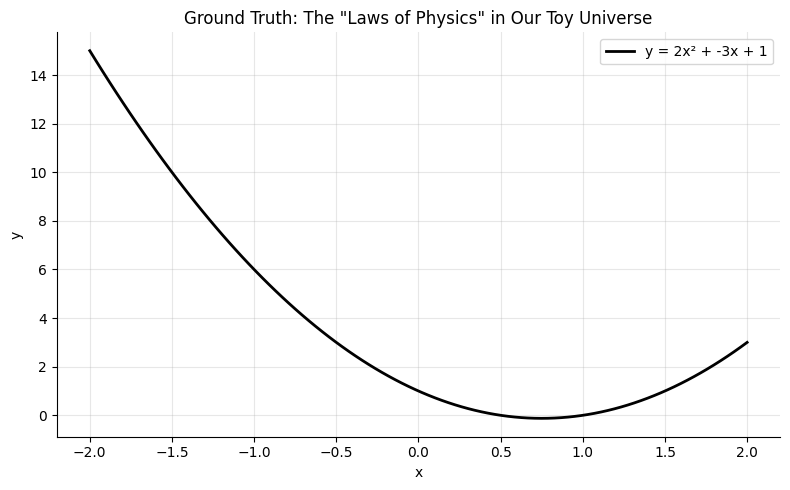

In [2]:
# | parabola-setup visualization inline
# Ground truth parabola: y = ax^2 + bx + c
a_true, b_true, c_true = 2, -3, 1

x = np.linspace(-2, 2, 100)
y_true = a_true * x**2 + b_true * x + c_true

plt.figure(figsize=(8, 5))
plt.plot(x, y_true, 'k-', linewidth=2, label=f'y = {a_true}x² + {b_true}x + {c_true}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ground Truth: The "Laws of Physics" in Our Toy Universe')
plt.legend()
plt.tight_layout()
plt.show()

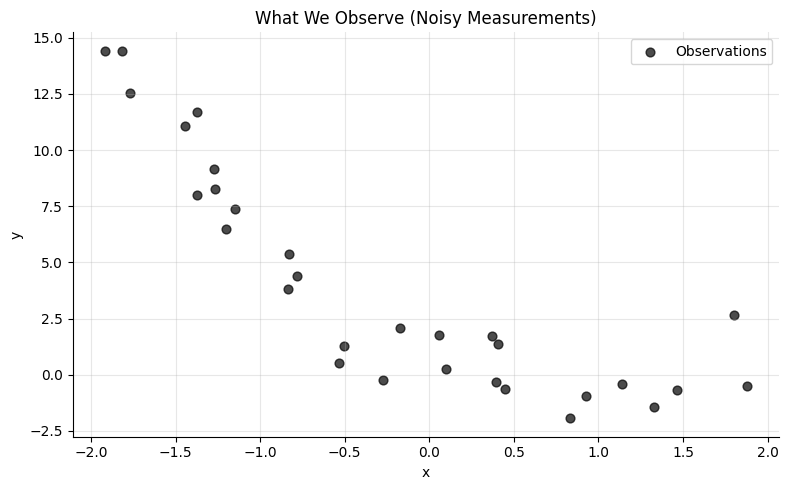

In [3]:
# | parabola-noisy visualization inline
# Sample points with noise - what an observer would see
np.random.seed(42)
n_samples = 30
x_samples = np.random.uniform(-2, 2, n_samples)
noise = np.random.normal(0, 1.5, n_samples)  # Increased noise
y_samples = a_true * x_samples**2 + b_true * x_samples + c_true + noise

plt.figure(figsize=(8, 5))
plt.scatter(x_samples, y_samples, c='black', alpha=0.7, s=40, label='Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('What We Observe (Noisy Measurements)')
plt.legend()
plt.tight_layout()
plt.show()

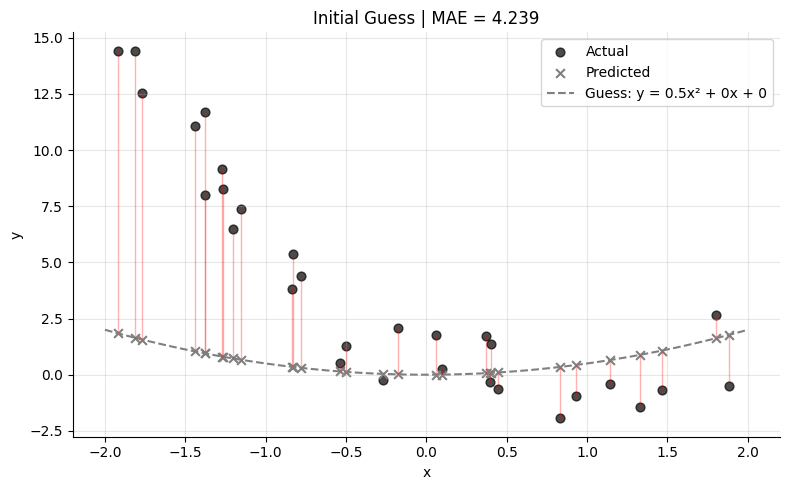

In [4]:
# | loss-initial visualization inline
# Initial guess and residual visualization
a, b, c = 0.5, 0, 0  # Bad initial guess

y_pred = a * x**2 + b * x + c
y_pred_samples = a * x_samples**2 + b * x_samples + c

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

loss = mae(y_samples, y_pred_samples)

plt.figure(figsize=(8, 5))
plt.scatter(x_samples, y_samples, c='black', alpha=0.7, s=40, label='Actual')
plt.scatter(x_samples, y_pred_samples, c='gray', marker='x', s=40, label='Predicted')

# Draw residual lines
for i in range(len(x_samples)):
    plt.plot([x_samples[i], x_samples[i]], [y_samples[i], y_pred_samples[i]], 
             'r-', alpha=0.3, linewidth=1)

plt.plot(x, y_pred, 'gray', linestyle='--', linewidth=1.5, 
         label=f'Guess: y = {a}x² + {b}x + {c}')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Initial Guess | MAE = {loss:.3f}')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# | manual-adjust inline expanded
# Manually trying different values of a
print("Trying different values of 'a' (with b=0, c=0):")
print("-" * 40)
for a_try in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]:
    y_pred = a_try * x_samples**2 + 0 * x_samples + 0
    loss = mae(y_samples, y_pred)
    indicator = " <-- closest" if abs(a_try - 2.0) < 0.1 else ""
    print(f"a = {a_try}: MAE = {loss:.3f}{indicator}")

Trying different values of 'a' (with b=0, c=0):
----------------------------------------
a = 0.0: MAE = 4.528
a = 0.5: MAE = 4.239
a = 1.0: MAE = 3.989
a = 1.5: MAE = 3.808
a = 2.0: MAE = 3.630 <-- closest
a = 2.5: MAE = 3.459


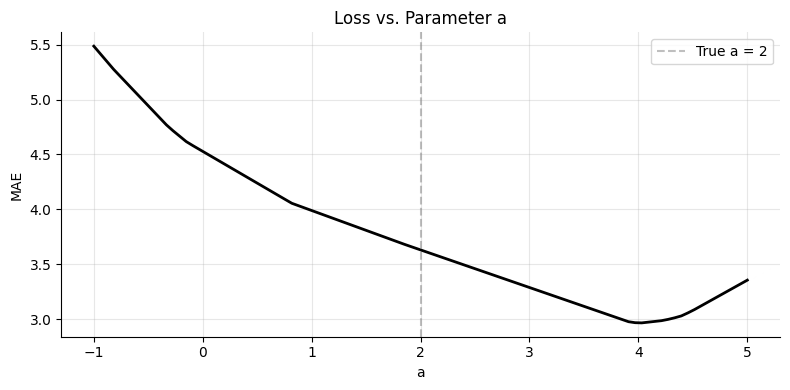

In [6]:
# | loss-curve-a visualization inline
# Loss curve as we vary parameter a (holding b, c fixed)
a_vals = np.linspace(-1, 5, 100)
losses_a = [mae(y_samples, av * x_samples**2 + 0 * x_samples + 0) for av in a_vals]

plt.figure(figsize=(8, 4))
plt.plot(a_vals, losses_a, 'k-', linewidth=2)
plt.axvline(x=a_true, color='gray', linestyle='--', alpha=0.5, label=f'True a = {a_true}')
plt.xlabel('a')
plt.ylabel('MAE')
plt.title('Loss vs. Parameter a')
plt.legend()
plt.tight_layout()
plt.show()

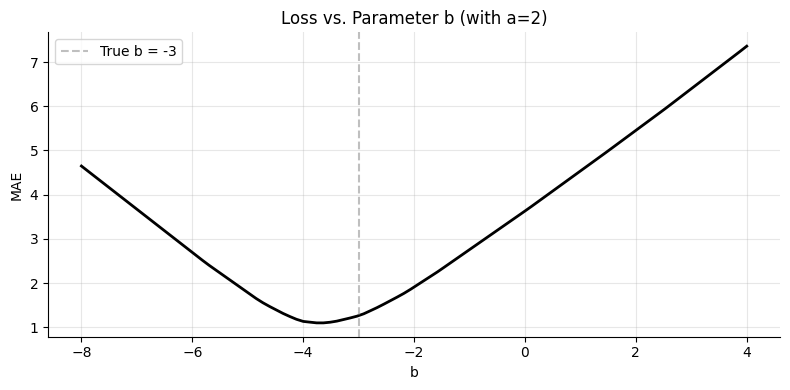

In [7]:
# | loss-curve-b visualization  inline
# Loss curve as we vary parameter b (holding a=2, c fixed)
b_vals = np.linspace(-8, 4, 100)
losses_b = [mae(y_samples, 2 * x_samples**2 + bv * x_samples + 0) for bv in b_vals]

plt.figure(figsize=(8, 4))
plt.plot(b_vals, losses_b, 'k-', linewidth=2)
plt.axvline(x=b_true, color='gray', linestyle='--', alpha=0.5, label=f'True b = {b_true}')
plt.xlabel('b')
plt.ylabel('MAE')
plt.title('Loss vs. Parameter b (with a=2)')
plt.legend()
plt.tight_layout()
plt.show()

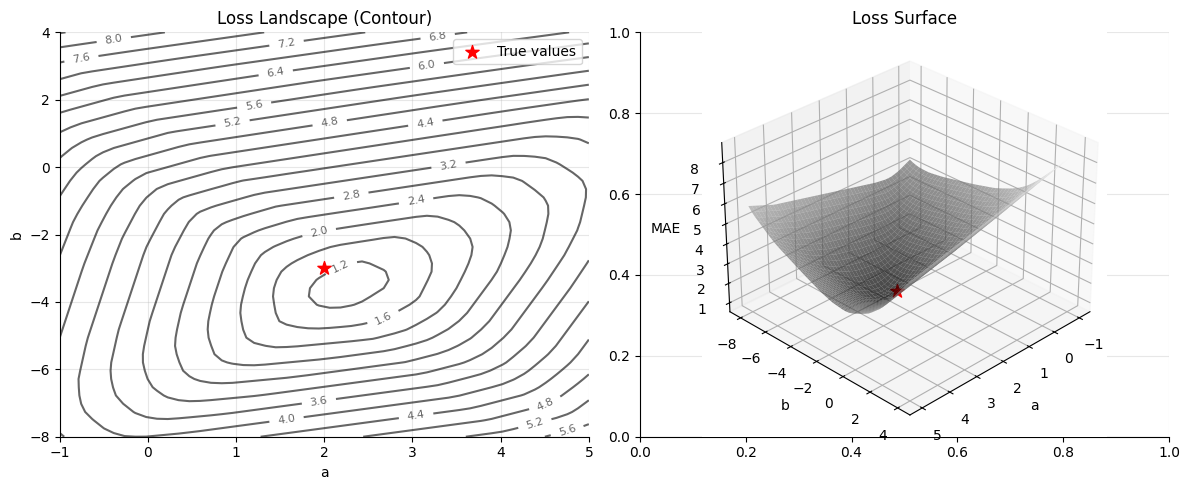

In [8]:
# | loss-surface visualization inline
# 3D loss surface over a and b (fixing c=0)
a_range = np.linspace(-1, 5, 50)
b_range = np.linspace(-8, 4, 50)
A, B = np.meshgrid(a_range, b_range)
Loss = np.zeros_like(A)

for i in range(len(a_range)):
    for j in range(len(b_range)):
        y_p = A[j, i] * x_samples**2 + B[j, i] * x_samples + 0
        Loss[j, i] = mae(y_samples, y_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Contour plot
cs = ax1.contour(A, B, Loss, levels=20, colors='black', alpha=0.6)
ax1.clabel(cs, inline=True, fontsize=8)
ax1.scatter([a_true], [b_true], c='red', s=100, marker='*', zorder=5, label='True values')
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_title('Loss Landscape (Contour)')
ax1.legend()

# 3D surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(A, B, Loss, cmap='gray', alpha=0.7, edgecolor='none')
ax2.scatter([a_true], [b_true], [mae(y_samples, a_true * x_samples**2 + b_true * x_samples)],
            c='red', s=100, marker='*')
ax2.set_xlabel('a')
ax2.set_ylabel('b')
ax2.set_zlabel('MAE')
ax2.set_title('Loss Surface')
ax2.view_init(30, 45)

plt.tight_layout()
plt.show()

In [9]:
# | gradient-step inline expanded
# Compute gradients and perform one step
def compute_gradients_mae(x, y, a, b, c):
    """Compute gradients of MAE with respect to a, b, c"""
    y_pred = a * x**2 + b * x + c
    error = y_pred - y
    sign = np.sign(error)  # Derivative of |x|
    
    da = np.mean(sign * x**2)
    db = np.mean(sign * x)
    dc = np.mean(sign)
    return da, db, dc

# Current parameters
a, b, c = 0.5, 0.0, 0.0
lr = 0.5  # Learning rate

print(f"Before: a={a:.3f}, b={b:.3f}, c={c:.3f}")
print(f"Loss: {mae(y_samples, a * x_samples**2 + b * x_samples + c):.3f}")
print()

# Compute gradients
da, db, dc = compute_gradients_mae(x_samples, y_samples, a, b, c)
print(f"Gradients: da={da:.3f}, db={db:.3f}, dc={dc:.3f}")
print()

# Update
a_new = a - lr * da
b_new = b - lr * db
c_new = c - lr * dc

print(f"After:  a={a_new:.3f}, b={b_new:.3f}, c={c_new:.3f}")
print(f"Loss: {mae(y_samples, a_new * x_samples**2 + b_new * x_samples + c_new):.3f}")

Before: a=0.500, b=0.000, c=0.000
Loss: 4.239

Gradients: da=-0.578, db=0.789, dc=-0.400

After:  a=0.789, b=-0.394, c=0.200
Loss: 3.687


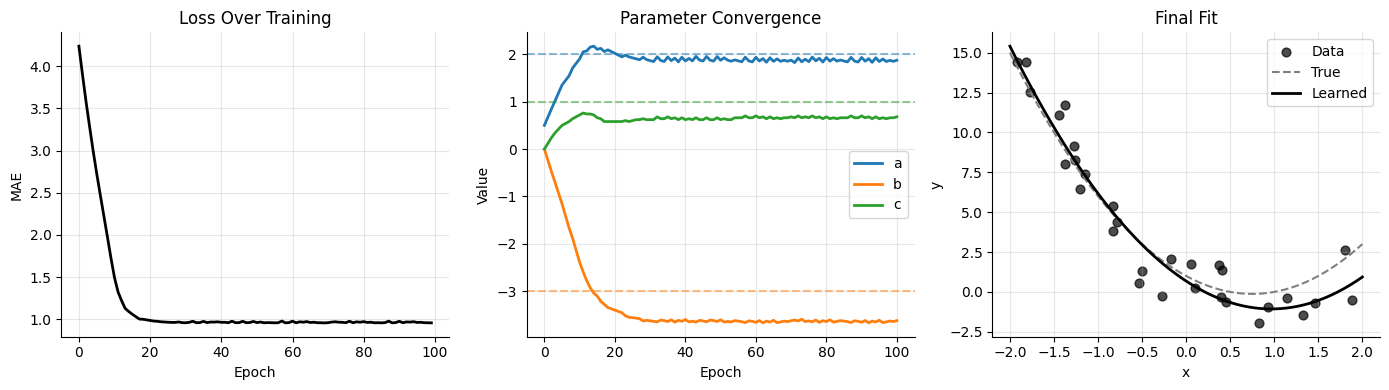


Final: a=1.873, b=-3.618, c=0.680
True:  a=2, b=-3, c=1


In [10]:
# | training-loop visualization inline
# Full training loop with visualization
a, b, c = 0.5, 0.0, 0.0
lr = 0.3
history = {'a': [a], 'b': [b], 'c': [c], 'loss': []}

for epoch in range(100):
    # Compute loss
    loss = mae(y_samples, a * x_samples**2 + b * x_samples + c)
    history['loss'].append(loss)
    
    # Compute gradients
    da, db, dc = compute_gradients_mae(x_samples, y_samples, a, b, c)
    
    # Update
    a -= lr * da
    b -= lr * db
    c -= lr * dc
    
    history['a'].append(a)
    history['b'].append(b)
    history['c'].append(c)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Loss curve
axes[0].plot(history['loss'], 'k-', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Loss Over Training')

# Parameter convergence
axes[1].plot(history['a'], label='a', linewidth=2)
axes[1].plot(history['b'], label='b', linewidth=2)
axes[1].plot(history['c'], label='c', linewidth=2)
axes[1].axhline(y=a_true, color='C0', linestyle='--', alpha=0.5)
axes[1].axhline(y=b_true, color='C1', linestyle='--', alpha=0.5)
axes[1].axhline(y=c_true, color='C2', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Value')
axes[1].set_title('Parameter Convergence')
axes[1].legend()

# Final fit
y_final = a * x**2 + b * x + c
axes[2].scatter(x_samples, y_samples, c='black', alpha=0.7, s=40, label='Data')
axes[2].plot(x, y_true, 'gray', linestyle='--', linewidth=1.5, label='True')
axes[2].plot(x, y_final, 'k-', linewidth=2, label=f'Learned')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('Final Fit')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"\nFinal: a={a:.3f}, b={b:.3f}, c={c:.3f}")
print(f"True:  a={a_true}, b={b_true}, c={c_true}")

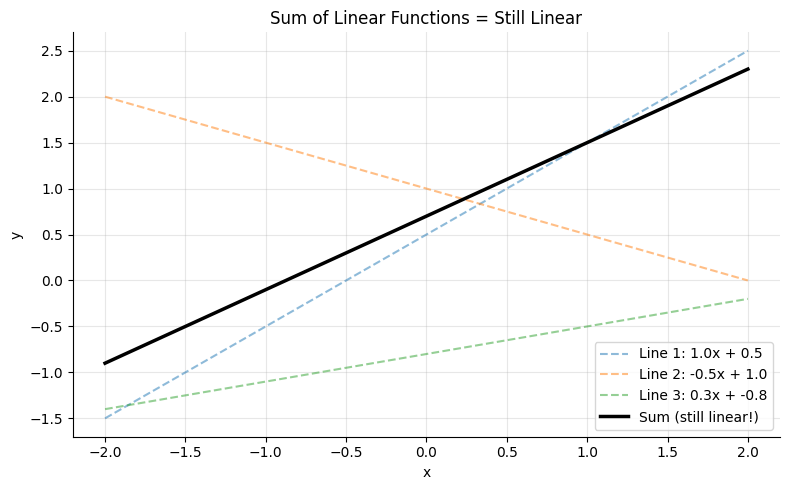

In [11]:
# | linear-combo inline visualization
# Demonstrating that sum of linear functions is still linear
x = np.linspace(-2, 2, 100)

# Three different linear functions
w1, b1 = 1.0, 0.5
w2, b2 = -0.5, 1.0
w3, b3 = 0.3, -0.8

y1 = w1 * x + b1
y2 = w2 * x + b2
y3 = w3 * x + b3
y_sum = y1 + y2 + y3

plt.figure(figsize=(8, 5))
plt.plot(x, y1, '--', alpha=0.5, linewidth=1.5, label=f'Line 1: {w1}x + {b1}')
plt.plot(x, y2, '--', alpha=0.5, linewidth=1.5, label=f'Line 2: {w2}x + {b2}')
plt.plot(x, y3, '--', alpha=0.5, linewidth=1.5, label=f'Line 3: {w3}x + {b3}')
plt.plot(x, y_sum, 'k-', linewidth=2.5, label='Sum (still linear!)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sum of Linear Functions = Still Linear')
plt.legend()
plt.tight_layout()
plt.show()

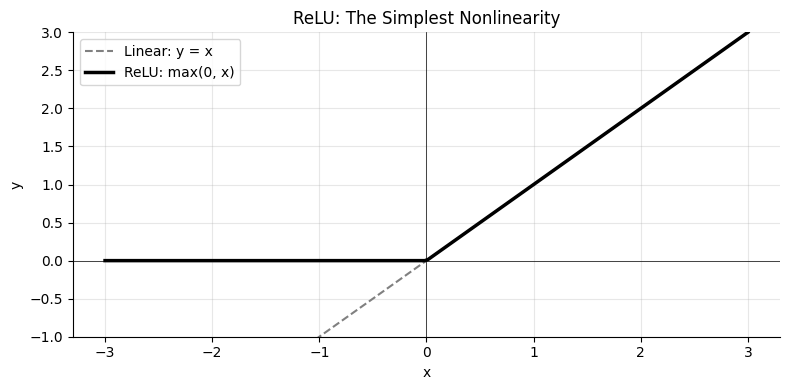

In [12]:
# | relu-viz visualization inline
# ReLU visualization
def relu(x):
    return np.maximum(0, x)

x_demo = np.linspace(-3, 3, 200)

plt.figure(figsize=(8, 4))
plt.plot(x_demo, x_demo, '--', color='gray', linewidth=1.5, label='Linear: y = x')
plt.plot(x_demo, relu(x_demo), 'k-', linewidth=2.5, label='ReLU: max(0, x)')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU: The Simplest Nonlinearity')
plt.legend()
plt.ylim(-1, 3)
plt.tight_layout()
plt.show()

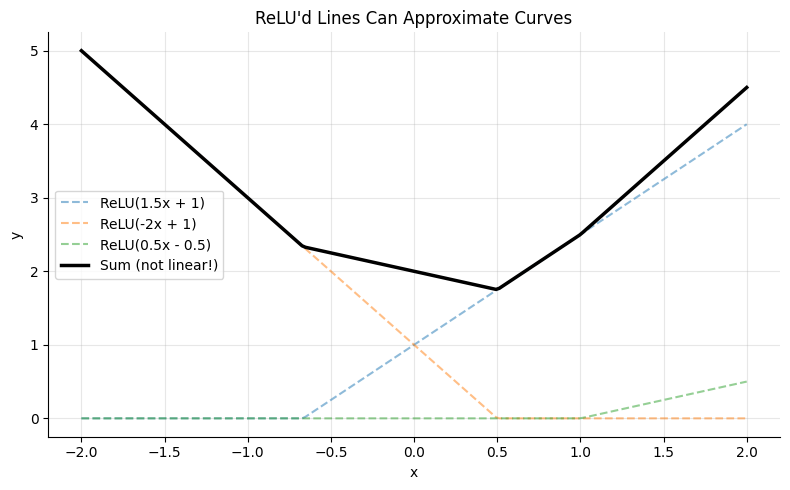

In [13]:
# | relu-combo visualization inline
# ReLU'd lines summing to a curve
x = np.linspace(-2, 2, 200)

# Three lines with ReLU
y1_relu = relu(1.5 * x + 1)
y2_relu = relu(-2 * x + 1)
y3_relu = relu(0.5 * x - 0.5)
y_sum_relu = y1_relu + y2_relu + y3_relu

plt.figure(figsize=(8, 5))
plt.plot(x, y1_relu, '--', alpha=0.5, linewidth=1.5, label='ReLU(1.5x + 1)')
plt.plot(x, y2_relu, '--', alpha=0.5, linewidth=1.5, label='ReLU(-2x + 1)')
plt.plot(x, y3_relu, '--', alpha=0.5, linewidth=1.5, label='ReLU(0.5x - 0.5)')
plt.plot(x, y_sum_relu, 'k-', linewidth=2.5, label='Sum (not linear!)')
plt.xlabel('x')
plt.ylabel('y')
plt.title("ReLU'd Lines Can Approximate Curves")
plt.legend()
plt.tight_layout()
plt.show()

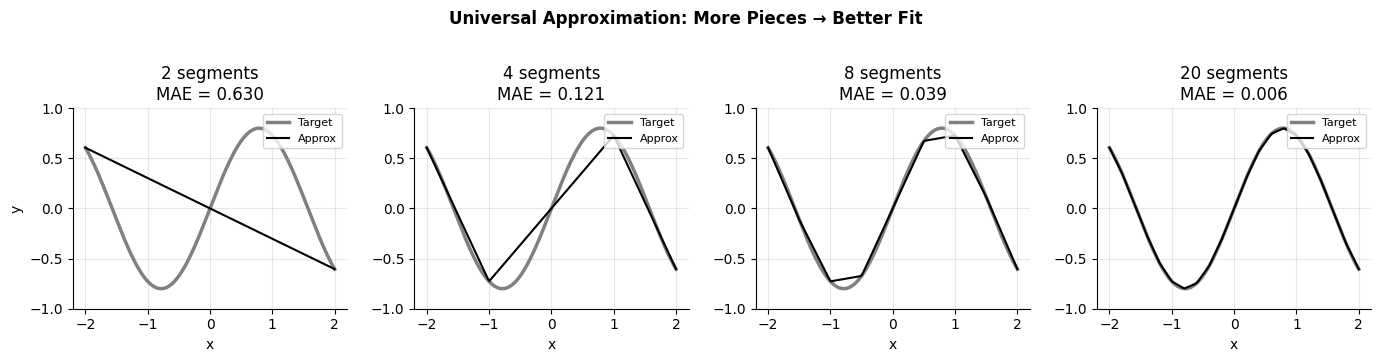

MAE decreases: 0.630 → 0.121 → 0.039 → 0.006


In [14]:
# | uat-demo visualization inline
# Universal Approximation: More segments = better fit

x = np.linspace(-2, 2, 200)
# Use x^2 * sin as target - not zero at sampling points
y_target = np.sin(2 * x) * 0.8  # A sine wave that's not zero at nice points

def piecewise_linear_approx(x, n_segments):
    """Approximate with piecewise linear segments (equivalent to ReLU network)"""
    x_pts = np.linspace(x.min(), x.max(), n_segments + 1)
    y_pts = np.sin(2 * x_pts) * 0.8  # Match target
    
    result = np.zeros_like(x)
    
    # Linear interpolation between knot points
    for i in range(len(x_pts) - 1):
        mask = (x >= x_pts[i]) & (x <= x_pts[i+1])
        t = (x[mask] - x_pts[i]) / (x_pts[i+1] - x_pts[i])
        result[mask] = y_pts[i] * (1 - t) + y_pts[i+1] * t
    
    return result

# Different numbers of segments
n_segments_list = [2, 4, 8, 20]
fig, axes = plt.subplots(1, 4, figsize=(14, 3.5))
mae_values = []

for ax, n_seg in zip(axes, n_segments_list):
    y_approx = piecewise_linear_approx(x, n_seg)
    mae = np.mean(np.abs(y_target - y_approx))
    mae_values.append(mae)
    
    ax.plot(x, y_target, 'gray', linewidth=2.5, label='Target')
    ax.plot(x, y_approx, 'k-', linewidth=1.5, label='Approx')
    ax.set_title(f'{n_seg} segments\nMAE = {mae:.3f}')
    ax.set_xlabel('x')
    if ax == axes[0]:
        ax.set_ylabel('y')
    ax.set_ylim(-1.0, 1.0)
    ax.legend(fontsize=8, loc='upper right')

plt.suptitle('Universal Approximation: More Pieces → Better Fit', y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"MAE decreases: {' → '.join([f'{m:.3f}' for m in mae_values])}")

In [15]:
# | perceptron-code inline expanded
# Simple perceptron implementation

def relu(x):
    return np.maximum(0, x)

def perceptron(x, w, b, activation=relu):
    """Single perceptron: y = activation(w . x + b)"""
    return activation(np.dot(w, x) + b)

# Example with 2 inputs
x = np.array([1.0, 2.0])  # Input vector
w = np.array([0.5, -0.3])  # Weights
b = 0.1  # Bias

# Forward pass step by step
weighted_sum = np.dot(w, x) + b
output = relu(weighted_sum)

print("Perceptron Forward Pass")
print("=" * 40)
print(f"Input x:      {x}")
print(f"Weights w:    {w}")
print(f"Bias b:       {b}")
print()
print(f"w . x:        {np.dot(w, x):.3f}")
print(f"w . x + b:    {weighted_sum:.3f}")
print(f"ReLU output:  {output:.3f}")

Perceptron Forward Pass
Input x:      [1. 2.]
Weights w:    [ 0.5 -0.3]
Bias b:       0.1

w . x:        -0.100
w . x + b:    0.000
ReLU output:  0.000


In [16]:
# | simple-network inline expanded
# Simple 2-layer neural network

def layer(x, W, b, activation=relu):
    """Dense layer: y = activation(x @ W + b)"""
    return activation(x @ W + b)

# Network architecture: 2 inputs -> 3 hidden -> 1 output
np.random.seed(42)
W1 = np.random.randn(2, 3) * 0.5  # Input to hidden
b1 = np.zeros(3)
W2 = np.random.randn(3, 1) * 0.5  # Hidden to output
b2 = np.zeros(1)

# Forward pass
x = np.array([1.0, 2.0])

# Hidden layer
h = layer(x, W1, b1)  # Shape: (3,)

# Output layer (no activation for regression)
y = h @ W2 + b2  # Shape: (1,)

print("2-Layer Network Forward Pass")
print("=" * 40)
print(f"Input x:         {x}")
print(f"W1 shape:        {W1.shape}")
print(f"W2 shape:        {W2.shape}")
print()
print(f"Hidden layer h:  {h}")
print(f"Output y:        {y}")

2-Layer Network Forward Pass
Input x:         [1. 2.]
W1 shape:        (2, 3)
W2 shape:        (3, 1)

Hidden layer h:  [1.77138693 0.         0.08970731]
Output y:        [1.37764083]


In [17]:
# | perceptron-pytorch expanded
# PyTorch equivalent of our simple classifier with embeddings
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    """
    A tiny classifier with trainable embeddings.
    This matches the interactive visualization!
    """
    def __init__(self, vocab_size=29, embed_dim=2, hidden_dim=3, output_dim=2):
        super().__init__()
        # Embedding layer: vocab_size x embed_dim lookup table
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # Hidden layer
        self.hidden = nn.Linear(embed_dim, hidden_dim)
        # Output layer
        self.output = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, token_ids):
        # token_ids: (batch, seq_len) - list of token IDs
        # Look up embeddings: (batch, seq_len, embed_dim)
        embeds = self.embedding(token_ids)
        # Pool by averaging: (batch, embed_dim)
        pooled = embeds.mean(dim=1)
        # Hidden layer with ReLU
        h = F.relu(self.hidden(pooled))
        # Output logits
        return self.output(h)

# Create model
model = SentimentClassifier(vocab_size=29, embed_dim=2, hidden_dim=3)
print("SentimentClassifier Architecture")
print("=" * 45)
print(model)
print()

# Example: "I love this" -> token IDs [12, 2, 13]
token_ids = torch.tensor([[12, 2, 13]])  # batch of 1 sentence
logits = model(token_ids)
probs = F.softmax(logits, dim=-1)

print("Forward Pass Example:")
print(f"Token IDs:  {token_ids.tolist()[0]}")
print(f"Embeddings: {model.embedding(token_ids).tolist()[0]}")
print(f"Pooled:     {model.embedding(token_ids).mean(dim=1).tolist()[0]}")
print(f"Logits:     {[f'{l:.3f}' for l in logits.tolist()[0]]}")
print(f"Probs:      {[f'{p:.1%}' for p in probs.tolist()[0]]}")
print(f"Prediction: {'Positive' if probs[0,1] > probs[0,0] else 'Negative'}")

SentimentClassifier Architecture
SentimentClassifier(
  (embedding): Embedding(29, 2)
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (output): Linear(in_features=3, out_features=2, bias=True)
)

Forward Pass Example:
Token IDs:  [12, 2, 13]
Embeddings: [[0.7041348218917847, -0.506013035774231], [-0.3589994013309479, 0.691878616809845], [-1.5352497100830078, -0.19193702936172485]]
Pooled:     [-0.396704763174057, -0.0020238161087036133]
Logits:     ['-0.429', '-0.312']
Probs:      ['47.1%', '52.9%']
Prediction: Positive


In [18]:
# | tokenize-basic inline expanded
# Basic tokenization demonstration
import re

text = "Hello, world! This is a test."

# Word-level tokenization
words = re.findall(r'\b\w+\b', text.lower())
print("Word-level tokenization:")
print(f"Input: '{text}'")
print(f"Tokens: {words}")
print(f"Count: {len(words)} tokens")
print()

# Character-level tokenization
chars = list(text)
print("Character-level tokenization:")
print(f"Tokens: {chars[:20]}...")
print(f"Count: {len(chars)} tokens")

Word-level tokenization:
Input: 'Hello, world! This is a test.'
Tokens: ['hello', 'world', 'this', 'is', 'a', 'test']
Count: 6 tokens

Character-level tokenization:
Tokens: ['H', 'e', 'l', 'l', 'o', ',', ' ', 'w', 'o', 'r', 'l', 'd', '!', ' ', 'T', 'h', 'i', 's', ' ', 'i']...
Count: 29 tokens


In [19]:
# | numericalize inline expanded
# Token to ID conversion

# Build a simple vocabulary
vocab = ['<PAD>', '<UNK>', 'hello', 'world', 'this', 'is', 'a', 'test']
token_to_id = {token: idx for idx, token in enumerate(vocab)}
id_to_token = {idx: token for idx, token in enumerate(vocab)}

# Tokenize and numericalize
text = "hello world"
tokens = text.split()
ids = [token_to_id.get(t, token_to_id['<UNK>']) for t in tokens]

print("Numericalization")
print("=" * 40)
print(f"Vocabulary: {vocab}")
print()
print(f"Text:    '{text}'")
print(f"Tokens:  {tokens}")
print(f"IDs:     {ids}")
print()
print("Mapping:")
for t, i in zip(tokens, ids):
    print(f"  '{t}' -> {i}")

Numericalization
Vocabulary: ['<PAD>', '<UNK>', 'hello', 'world', 'this', 'is', 'a', 'test']

Text:    'hello world'
Tokens:  ['hello', 'world']
IDs:     [2, 3]

Mapping:
  'hello' -> 2
  'world' -> 3


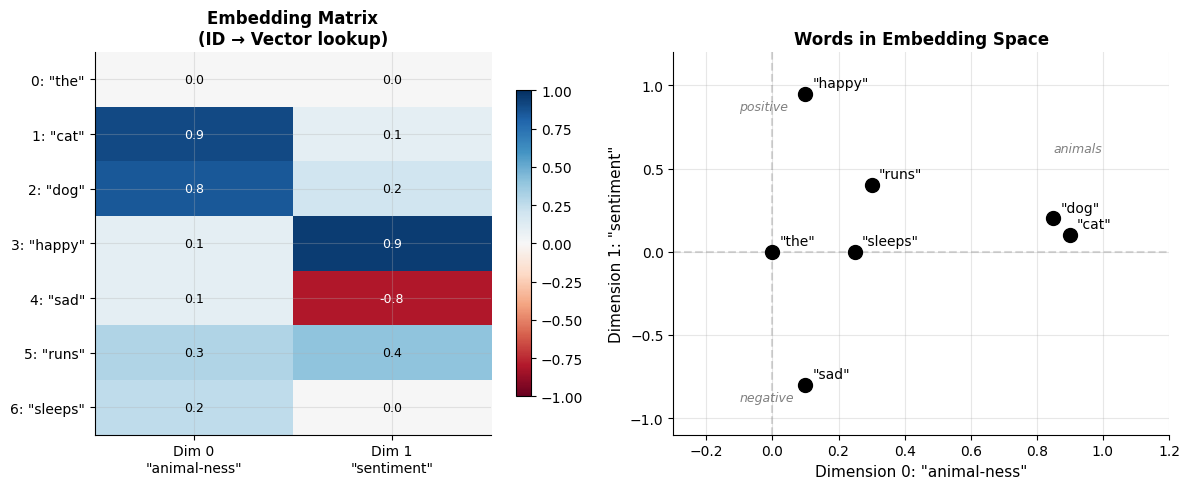

Token ID → Embedding lookup:
  "cat" (ID=1)  → [0.90, 0.10]
  "happy" (ID=3) → [0.10, 0.95]

Similar words cluster together in embedding space!


In [20]:
# | embedding-demo visualization inline
# Embeddings: From discrete IDs to continuous vectors

import numpy as np
import matplotlib.pyplot as plt

# Our tiny vocabulary
vocab = ['the', 'cat', 'dog', 'happy', 'sad', 'runs', 'sleeps']
n_vocab = len(vocab)

# 2D embeddings - imagine these as learned features:
# Dimension 0: "animal-ness" (high for cat/dog, low for others)
# Dimension 1: "positive sentiment" (high for happy, low for sad)
embeddings = {
    'the':    [0.0, 0.0],    # Neutral word
    'cat':    [0.9, 0.1],    # High animal, neutral sentiment
    'dog':    [0.85, 0.2],   # High animal, slightly positive
    'happy':  [0.1, 0.95],   # Low animal, high positive
    'sad':    [0.1, -0.8],   # Low animal, negative
    'runs':   [0.3, 0.4],    # Some animal association, slightly positive
    'sleeps': [0.25, 0.0],   # Some animal association, neutral
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: The embedding lookup table
ax = axes[0]
embed_matrix = np.array([embeddings[w] for w in vocab])
im = ax.imshow(embed_matrix, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Dim 0\n"animal-ness"', 'Dim 1\n"sentiment"'], fontsize=10)
ax.set_yticks(range(n_vocab))
ax.set_yticklabels([f'{i}: "{w}"' for i, w in enumerate(vocab)], fontsize=10)
ax.set_title('Embedding Matrix\n(ID → Vector lookup)', fontweight='bold')

# Add values to cells
for i in range(n_vocab):
    for j in range(2):
        val = embed_matrix[i, j]
        color = 'white' if abs(val) > 0.5 else 'black'
        ax.text(j, i, f'{val:.1f}', ha='center', va='center', color=color, fontsize=9)

plt.colorbar(im, ax=ax, shrink=0.8)

# Right: 2D scatter plot of embeddings
ax = axes[1]
for word, (x, y) in embeddings.items():
    ax.scatter(x, y, s=100, c='black', zorder=5)
    ax.annotate(f'"{word}"', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)

ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
ax.set_xlabel('Dimension 0: "animal-ness"', fontsize=11)
ax.set_ylabel('Dimension 1: "sentiment"', fontsize=11)
ax.set_title('Words in Embedding Space', fontweight='bold')
ax.set_xlim(-0.3, 1.2)
ax.set_ylim(-1.1, 1.2)

# Add region labels
ax.text(0.85, 0.6, 'animals', fontsize=9, color='gray', style='italic')
ax.text(-0.1, 0.85, 'positive', fontsize=9, color='gray', style='italic')
ax.text(-0.1, -0.9, 'negative', fontsize=9, color='gray', style='italic')

plt.tight_layout()
plt.show()

print("Token ID → Embedding lookup:")
print("=" * 40)
print('  "cat" (ID=1)  → [0.90, 0.10]')
print('  "happy" (ID=3) → [0.10, 0.95]')
print()
print("Similar words cluster together in embedding space!")

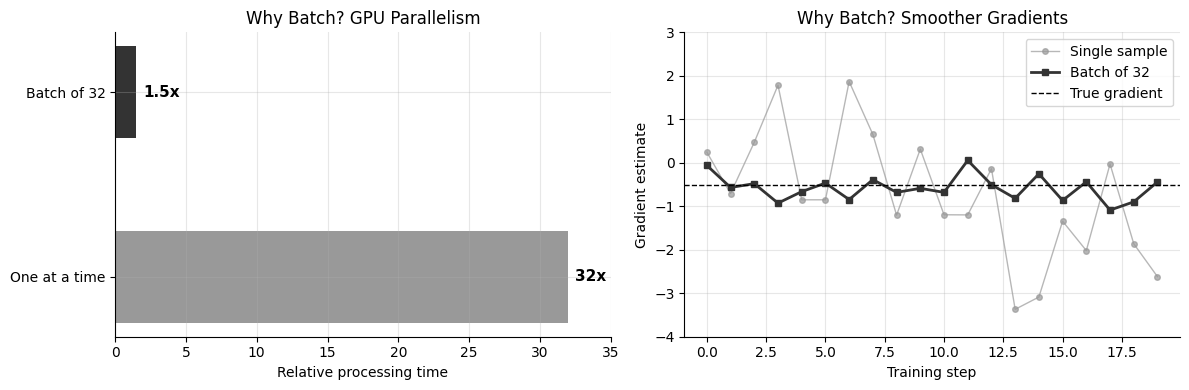

Batching benefits:
1. GPU processes 32 samples nearly as fast as 1
2. Averaging gradients reduces noise, giving more reliable updates


In [21]:
# | batch-demo visualization inline
# Demonstrating batching: processing multiple samples at once
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Single sample vs batch processing
# Show GPU utilization concept
methods = ['One at a time', 'Batch of 32']
times = [32, 1.5]  # Relative time units
colors = ['#999999', '#333333']

bars = axes[0].barh(methods, times, color=colors, height=0.5)
axes[0].set_xlabel('Relative processing time')
axes[0].set_title('Why Batch? GPU Parallelism')
axes[0].set_xlim(0, 35)

for bar, t in zip(bars, times):
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{t}x', va='center', fontsize=11, fontweight='bold')

# Right: Gradient noise reduction
np.random.seed(42)
n_steps = 20

# Single sample gradients (noisy)
true_direction = -0.5
single_grads = true_direction + np.random.randn(n_steps) * 1.5

# Batch gradients (smoother)
batch_grads = true_direction + np.random.randn(n_steps) * 0.3

x = np.arange(n_steps)
axes[1].plot(x, single_grads, 'o-', color='#999999', linewidth=1, markersize=4, label='Single sample', alpha=0.7)
axes[1].plot(x, batch_grads, 's-', color='#333333', linewidth=2, markersize=5, label='Batch of 32')
axes[1].axhline(y=true_direction, color='black', linestyle='--', linewidth=1, label='True gradient')
axes[1].set_xlabel('Training step')
axes[1].set_ylabel('Gradient estimate')
axes[1].set_title('Why Batch? Smoother Gradients')
axes[1].legend(loc='upper right')
axes[1].set_ylim(-4, 3)

plt.tight_layout()
plt.show()

print('Batching benefits:')
print('1. GPU processes 32 samples nearly as fast as 1')
print('2. Averaging gradients reduces noise, giving more reliable updates')


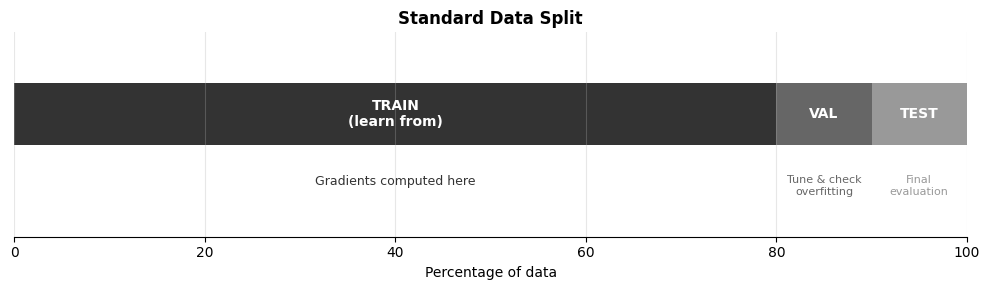

Why separate sets?
- Training: Model learns patterns from this data
- Validation: Catches overfitting (memorization vs learning)
- Test: Unbiased final score (only used once!)


In [22]:
# | data-splits visualization inline
# Train/Validation/Test split visualization
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 3))

# Create a horizontal stacked bar showing the split
train_pct, val_pct, test_pct = 80, 10, 10

# Draw the bars
ax.barh(0, train_pct, color='#333333', label=f'Training ({train_pct}%)', height=0.6)
ax.barh(0, val_pct, left=train_pct, color='#666666', label=f'Validation ({val_pct}%)', height=0.6)
ax.barh(0, test_pct, left=train_pct+val_pct, color='#999999', label=f'Test ({test_pct}%)', height=0.6)

# Add labels inside bars
ax.text(train_pct/2, 0, 'TRAIN\n(learn from)', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
ax.text(train_pct + val_pct/2, 0, 'VAL', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
ax.text(train_pct + val_pct + test_pct/2, 0, 'TEST', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# Add descriptions below
ax.text(train_pct/2, -0.6, 'Gradients computed here', ha='center', va='top', fontsize=9, color='#333333')
ax.text(train_pct + val_pct/2, -0.6, 'Tune & check\noverfitting', ha='center', va='top', fontsize=8, color='#666666')
ax.text(train_pct + val_pct + test_pct/2, -0.6, 'Final\nevaluation', ha='center', va='top', fontsize=8, color='#999999')

ax.set_xlim(0, 100)
ax.set_ylim(-1.2, 0.8)
ax.set_xlabel('Percentage of data')
ax.set_yticks([])
ax.set_title('Standard Data Split', fontsize=12, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

print('Why separate sets?')
print('- Training: Model learns patterns from this data')
print('- Validation: Catches overfitting (memorization vs learning)')
print('- Test: Unbiased final score (only used once!)')


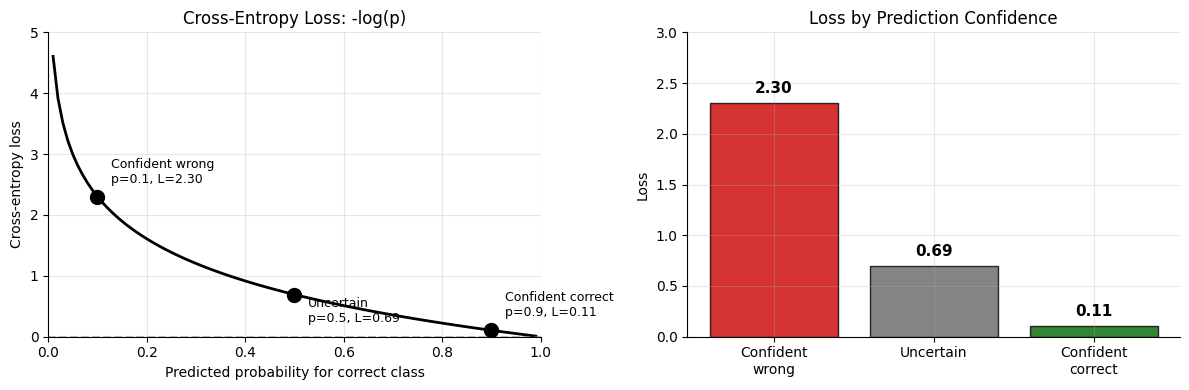

Cross-Entropy: Higher loss = worse prediction
Confident wrong    p(correct)=0.1  Loss=2.30
Uncertain          p(correct)=0.5  Loss=0.69
Confident correct  p(correct)=0.9  Loss=0.11


In [23]:
# | cross-entropy-demo visualization inline
# Cross-entropy loss demonstration
import numpy as np
import matplotlib.pyplot as plt

def cross_entropy(p_correct):
    """Cross-entropy loss: -log(p_correct)"""
    return -np.log(np.clip(p_correct, 1e-10, 1.0))

# Range of predicted probabilities for correct class
p = np.linspace(0.01, 0.99, 100)
loss = cross_entropy(p)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Cross-entropy curve
axes[0].plot(p, loss, 'k-', linewidth=2)
axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Mark key points
points = [(0.9, 'Confident correct'), (0.5, 'Uncertain'), (0.1, 'Confident wrong')]
for prob, label in points:
    l = cross_entropy(prob)
    axes[0].scatter([prob], [l], c='black', s=100, zorder=5)
    offset = (10, 10) if prob != 0.5 else (10, -20)
    axes[0].annotate(f'{label}\np={prob}, L={l:.2f}', (prob, l), 
                     textcoords='offset points', xytext=offset, fontsize=9)

axes[0].set_xlabel('Predicted probability for correct class')
axes[0].set_ylabel('Cross-entropy loss')
axes[0].set_title('Cross-Entropy Loss: -log(p)')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 5)

# Right: Bar chart showing loss for different confidence levels
scenarios = ['Confident\nwrong', 'Uncertain', 'Confident\ncorrect']
probs_correct = [0.1, 0.5, 0.9]  # probability assigned to correct class
losses = [cross_entropy(p) for p in probs_correct]

colors = ['#cc0000', '#666666', '#006600']  # red, gray, green
bars = axes[1].bar(scenarios, losses, color=colors, alpha=0.8, edgecolor='black')

# Add loss values on bars
for bar, loss_val in zip(bars, losses):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{loss_val:.2f}', ha='center', fontsize=11, fontweight='bold')

axes[1].set_ylabel('Loss')
axes[1].set_title('Loss by Prediction Confidence')
axes[1].set_ylim(0, 3)

plt.tight_layout()
plt.show()

print('Cross-Entropy: Higher loss = worse prediction')
print('=' * 45)
for scenario, prob, loss_val in zip(scenarios, probs_correct, losses):
    print(f'{scenario.replace(chr(10), " "):18} p(correct)={prob}  Loss={loss_val:.2f}')


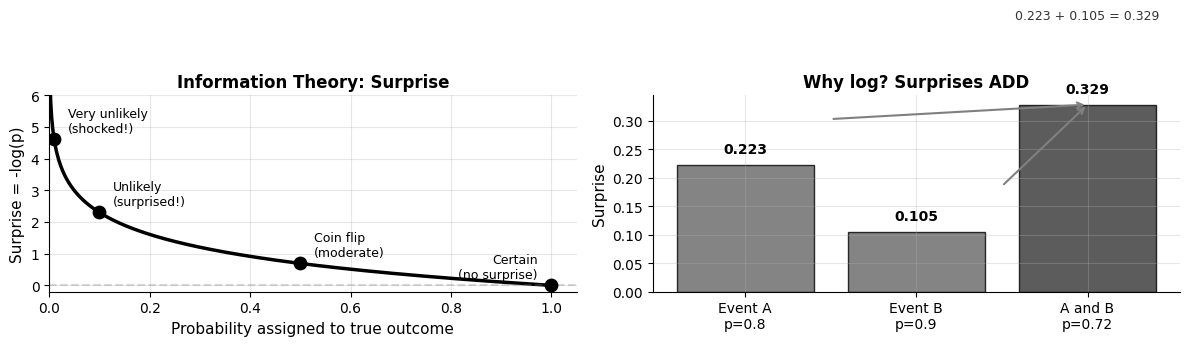

Key insight: log turns multiplication into addition
p(A and B) = p(A) × p(B) = 0.8 × 0.9 = 0.72
surprise(A and B) = surprise(A) + surprise(B) = 0.223 + 0.105 = 0.329


In [24]:
# | cross-entropy-surprise visualization inline
# The Surprise Function: -log(p)

import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.001, 1, 500)
surprise = -np.log(p)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: The surprise curve
ax = axes[0]
ax.plot(p, surprise, 'k-', linewidth=2.5)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)

# Annotate key points
annotations = [
    (1.0, 0, 'Certain\n(no surprise)', 'right'),
    (0.5, 0.693, 'Coin flip\n(moderate)', 'left'),
    (0.1, 2.303, 'Unlikely\n(surprised!)', 'left'),
    (0.01, 4.605, 'Very unlikely\n(shocked!)', 'left'),
]
for px, py, label, ha in annotations:
    ax.scatter([px], [py], c='black', s=80, zorder=5)
    offset = (-10, 5) if ha == 'right' else (10, 5)
    ax.annotate(label, (px, py), textcoords='offset points', 
                xytext=offset, fontsize=9, ha=ha)

ax.set_xlabel('Probability assigned to true outcome', fontsize=11)
ax.set_ylabel('Surprise = -log(p)', fontsize=11)
ax.set_title('Information Theory: Surprise', fontweight='bold')
ax.set_xlim(0, 1.05)
ax.set_ylim(-0.2, 6)

# Right: Why log? Show that it gives nice properties
ax = axes[1]

# Two independent events: p1 * p2
p1, p2 = 0.8, 0.9
p_joint = p1 * p2

# Surprise should add for independent events
s1 = -np.log(p1)
s2 = -np.log(p2)
s_joint = -np.log(p_joint)

bars_x = ['Event A\np=0.8', 'Event B\np=0.9', 'A and B\np=0.72']
bars_y = [s1, s2, s_joint]
colors = ['#666666', '#666666', '#333333']

bars = ax.bar(bars_x, bars_y, color=colors, edgecolor='black', alpha=0.8)

# Add values
for bar, val in zip(bars, bars_y):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'{val:.3f}', ha='center', fontsize=10, fontweight='bold')

# Show that surprises add
ax.annotate('', xy=(2, s1 + s2), xytext=(0.5, s1 + 0.08),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))
ax.annotate('', xy=(2, s1 + s2), xytext=(1.5, s2 + 0.08),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax.set_ylabel('Surprise', fontsize=11)
ax.set_title('Why log? Surprises ADD', fontweight='bold')
ax.text(2, s_joint + 0.15, f'{s1:.3f} + {s2:.3f} = {s_joint:.3f}', 
        ha='center', fontsize=9, color='#333333')

plt.tight_layout()
plt.show()

print('Key insight: log turns multiplication into addition')
print(f'p(A and B) = p(A) × p(B) = {p1} × {p2} = {p_joint:.2f}')
print(f'surprise(A and B) = surprise(A) + surprise(B) = {s1:.3f} + {s2:.3f} = {s_joint:.3f}')

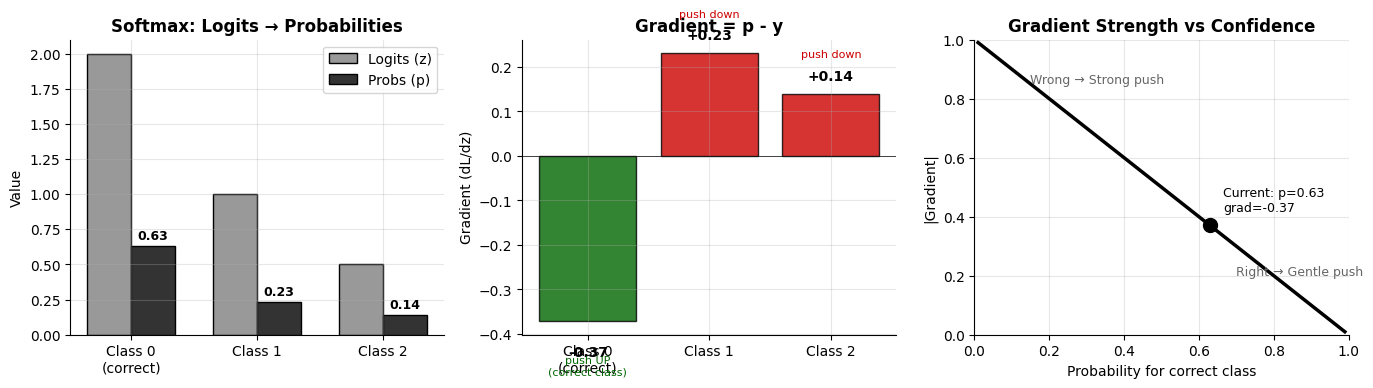

The Beauty of Cross-Entropy + Softmax
Logits z:        [2.  1.  0.5]
Softmax p:       ['0.629', '0.231', '0.140']
True label y:    [1 0 0]
Gradient p-y:    ['-0.371', '+0.231', '+0.140']

Key insight: gradient is simply (predicted - actual)
- More wrong → larger gradient → faster learning
- More right → smaller gradient → fine tuning


In [25]:
# | cross-entropy-gradient visualization inline
# The Beautiful Gradient: p - y

import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    """Convert logits to probabilities"""
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / exp_z.sum()

def cross_entropy_gradient(logits, true_class):
    """
    Compute gradient of cross-entropy loss w.r.t. logits
    
    The math:
    - p = softmax(z)
    - L = -log(p[true_class])
    - dL/dz[i] = p[i] - y[i]  where y is one-hot
    """
    probs = softmax(logits)
    grad = probs.copy()
    grad[true_class] -= 1  # This is p - y (one-hot subtraction)
    return probs, grad

# Example: 3-class classification
logits = np.array([2.0, 1.0, 0.5])
true_class = 0  # Correct answer is class 0

probs, grad = cross_entropy_gradient(logits, true_class)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Left: Logits -> Softmax -> Probabilities
ax = axes[0]
classes = ['Class 0\n(correct)', 'Class 1', 'Class 2']
x_pos = np.arange(3)

# Show logits and probs as grouped bars
width = 0.35
bars1 = ax.bar(x_pos - width/2, logits, width, label='Logits (z)', color='#999999', edgecolor='black')
bars2 = ax.bar(x_pos + width/2, probs, width, label='Probs (p)', color='#333333', edgecolor='black')

ax.set_xticks(x_pos)
ax.set_xticklabels(classes)
ax.set_ylabel('Value')
ax.set_title('Softmax: Logits → Probabilities', fontweight='bold')
ax.legend()

# Add probability values
for bar, p in zip(bars2, probs):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
            f'{p:.2f}', ha='center', fontsize=9, fontweight='bold')

# Middle: The gradient p - y
ax = axes[1]
y_onehot = np.array([1, 0, 0])  # True label as one-hot

bars = ax.bar(x_pos, grad, color=['#006600', '#cc0000', '#cc0000'], 
              edgecolor='black', alpha=0.8)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_xticks(x_pos)
ax.set_xticklabels(classes)
ax.set_ylabel('Gradient (dL/dz)')
ax.set_title('Gradient = p - y', fontweight='bold')

# Add gradient values
for bar, g in zip(bars, grad):
    offset = 0.03 if g >= 0 else -0.08
    ax.text(bar.get_x() + bar.get_width()/2, g + offset,
            f'{g:+.2f}', ha='center', fontsize=10, fontweight='bold')

# Annotate meaning
ax.text(0, grad[0] - 0.12, 'push UP\n(correct class)', ha='center', fontsize=8, color='#006600')
ax.text(1, grad[1] + 0.08, 'push down', ha='center', fontsize=8, color='#cc0000')
ax.text(2, grad[2] + 0.08, 'push down', ha='center', fontsize=8, color='#cc0000')

# Right: Show gradient magnitude vs confidence
ax = axes[2]
confidences = np.linspace(0.01, 0.99, 100)
gradient_magnitudes = 1 - confidences  # |p - 1| when correct class

ax.plot(confidences, gradient_magnitudes, 'k-', linewidth=2.5)
ax.scatter([probs[0]], [1 - probs[0]], c='black', s=100, zorder=5)
ax.annotate(f'Current: p={probs[0]:.2f}\ngrad={grad[0]:.2f}', 
            (probs[0], 1 - probs[0]), textcoords='offset points',
            xytext=(10, 10), fontsize=9)

ax.set_xlabel('Probability for correct class')
ax.set_ylabel('|Gradient|')
ax.set_title('Gradient Strength vs Confidence', fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Add annotation
ax.text(0.15, 0.85, 'Wrong → Strong push', fontsize=9, color='#666666')
ax.text(0.7, 0.2, 'Right → Gentle push', fontsize=9, color='#666666')

plt.tight_layout()
plt.show()

print('The Beauty of Cross-Entropy + Softmax')
print('=' * 50)
print(f'Logits z:        {logits}')
print(f'Softmax p:       {[f"{p:.3f}" for p in probs]}')
print(f'True label y:    {y_onehot}')
print(f'Gradient p-y:    {[f"{g:+.3f}" for g in grad]}')
print()
print('Key insight: gradient is simply (predicted - actual)')
print('- More wrong → larger gradient → faster learning')
print('- More right → smaller gradient → fine tuning')

In [26]:
# | cross-entropy-code expanded
# Cross-Entropy from Scratch: Complete Implementation

import numpy as np

def softmax(z):
    """
    Softmax: converts logits to probabilities
    
    softmax(z)_i = exp(z_i) / sum(exp(z_j))
    
    Properties:
    - All outputs between 0 and 1
    - All outputs sum to 1
    - Preserves relative ordering of logits
    """
    # Subtract max for numerical stability (doesn't change result)
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum()

def cross_entropy_loss(logits, true_class):
    """
    Cross-entropy loss for a single example
    
    L = -log(p[true_class])
    
    where p = softmax(logits)
    """
    probs = softmax(logits)
    # Add small epsilon to prevent log(0)
    return -np.log(probs[true_class] + 1e-10)

def cross_entropy_gradient(logits, true_class):
    """
    Gradient of cross-entropy loss w.r.t. logits
    
    dL/dz = p - y
    
    where y is one-hot encoded true label
    """
    probs = softmax(logits)
    grad = probs.copy()
    grad[true_class] -= 1  # Equivalent to p - y
    return grad

# Demonstration
print('Cross-Entropy Loss: Step by Step')
print('=' * 50)

# Our network outputs these raw scores (logits)
logits = np.array([2.5, 0.8, -0.3])
true_class = 0  # The correct answer is class 0

print(f'Logits (raw network output):  {logits}')
print(f'True class:                   {true_class}')
print()

# Step 1: Apply softmax to get probabilities
probs = softmax(logits)
print('Step 1: Softmax → Probabilities')
expvals = np.exp(logits - np.max(logits))
print(f'  exp(logits):      {[f"{v:.3f}" for v in expvals]}')
print(f'  sum:              {np.sum(expvals):.3f}')
print(f'  probabilities:    {[f"{p:.3f}" for p in probs]}')
print(f'  (sum = {sum(probs):.3f})')
print()

# Step 2: Compute loss
loss = cross_entropy_loss(logits, true_class)
print('Step 2: Cross-Entropy Loss')
print(f'  p[correct class]: {probs[true_class]:.3f}')
print(f'  -log(p):          {loss:.3f}')
print()

# Step 3: Compute gradient
grad = cross_entropy_gradient(logits, true_class)
print('Step 3: Gradient (p - y)')
y_onehot = np.zeros(3)
y_onehot[true_class] = 1
print(f'  p:      {[f"{p:.3f}" for p in probs]}')
print(f'  y:      {y_onehot.astype(int).tolist()}')
print(f'  p - y:  {[f"{g:+.3f}" for g in grad]}')
print()

# Compare: What if we were very wrong?
print('Comparison: Very Wrong Prediction')
print('-' * 50)
bad_logits = np.array([-1.0, 2.5, 0.5])  # Network thinks class 1, but correct is 0
bad_probs = softmax(bad_logits)
bad_loss = cross_entropy_loss(bad_logits, true_class)
bad_grad = cross_entropy_gradient(bad_logits, true_class)
print(f'Probabilities:  {[f"{p:.3f}" for p in bad_probs]}')
print(f'Loss:           {bad_loss:.3f} (much higher!)')
print(f'Gradient:       {[f"{g:+.3f}" for g in bad_grad]} (much stronger!)')

Cross-Entropy Loss: Step by Step
Logits (raw network output):  [ 2.5  0.8 -0.3]
True class:                   0

Step 1: Softmax → Probabilities
  exp(logits):      ['1.000', '0.183', '0.061']
  sum:              1.243
  probabilities:    ['0.804', '0.147', '0.049']
  (sum = 1.000)

Step 2: Cross-Entropy Loss
  p[correct class]: 0.804
  -log(p):          0.218

Step 3: Gradient (p - y)
  p:      ['0.804', '0.147', '0.049']
  y:      [1, 0, 0]
  p - y:  ['-0.196', '+0.147', '+0.049']

Comparison: Very Wrong Prediction
--------------------------------------------------
Probabilities:  ['0.026', '0.858', '0.116']
Loss:           3.653 (much higher!)
Gradient:       ['-0.974', '+0.858', '+0.116'] (much stronger!)


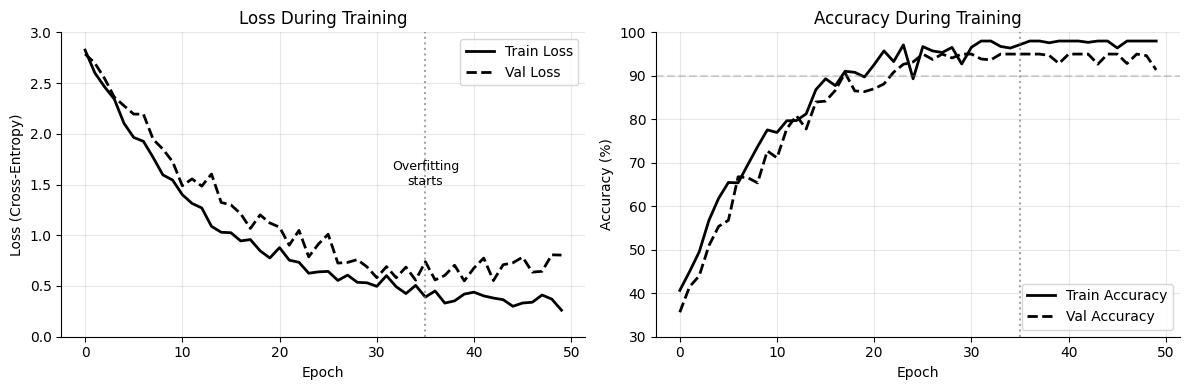

Training Summary
Best validation loss: 0.550 (epoch 40)
Best validation acc:  95.0% (epoch 26)

Note: After epoch 35, val loss rises while train loss drops
This is overfitting - the model memorizes training data.


In [27]:
# | loss-vs-accuracy visualization inline
# Loss vs Accuracy during training
import numpy as np
import matplotlib.pyplot as plt

# Simulate training metrics
np.random.seed(42)
epochs = 50

# Training metrics (smooth decay with noise)
train_loss = 2.5 * np.exp(-0.08 * np.arange(epochs)) + 0.3 + np.random.randn(epochs) * 0.05
train_acc = 1 - 0.6 * np.exp(-0.1 * np.arange(epochs)) + np.random.randn(epochs) * 0.02
train_acc = np.clip(train_acc, 0.4, 0.98)

# Validation metrics (similar but with slight overfitting at end)
val_loss = 2.5 * np.exp(-0.07 * np.arange(epochs)) + 0.4
val_loss[35:] += np.linspace(0, 0.3, epochs-35)  # Overfitting
val_loss += np.random.randn(epochs) * 0.08

val_acc = 1 - 0.65 * np.exp(-0.09 * np.arange(epochs)) + np.random.randn(epochs) * 0.025
val_acc[35:] -= np.linspace(0, 0.05, epochs-35)  # Overfitting
val_acc = np.clip(val_acc, 0.35, 0.95)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Loss curves
axes[0].plot(train_loss, 'k-', linewidth=2, label='Train Loss')
axes[0].plot(val_loss, 'k--', linewidth=2, label='Val Loss')
axes[0].axvline(x=35, color='gray', linestyle=':', alpha=0.7)
axes[0].annotate('Overfitting\nstarts', (35, 1.5), fontsize=9, ha='center')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (Cross-Entropy)')
axes[0].set_title('Loss During Training')
axes[0].legend()
axes[0].set_ylim(0, 3)

# Right: Accuracy curves
axes[1].plot(train_acc * 100, 'k-', linewidth=2, label='Train Accuracy')
axes[1].plot(val_acc * 100, 'k--', linewidth=2, label='Val Accuracy')
axes[1].axvline(x=35, color='gray', linestyle=':', alpha=0.7)
axes[1].axhline(y=90, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Accuracy During Training')
axes[1].legend()
axes[1].set_ylim(30, 100)

plt.tight_layout()
plt.show()

print('Training Summary')
print('=' * 50)
print(f'Best validation loss: {min(val_loss):.3f} (epoch {np.argmin(val_loss)+1})')
print(f'Best validation acc:  {max(val_acc)*100:.1f}% (epoch {np.argmax(val_acc)+1})')
print(f'\nNote: After epoch 35, val loss rises while train loss drops')
print('This is overfitting - the model memorizes training data.')

In [28]:
# | embedding-lookup-code expanded
# Embedding lookup: just row selection from a matrix
import torch
import torch.nn as nn

# Vocabulary: 5 words, 4-dimensional embeddings
vocab = ['the', 'cat', 'sat', 'on', 'mat']
embed_dim = 4

# The embedding matrix E: each row is a word's vector
E = torch.randn(len(vocab), embed_dim)

print('Embedding Matrix E:')
print('=' * 50)
for i, word in enumerate(vocab):
    print(f'{i}: "{word}"  ->  {E[i].tolist()}')
print()

# Lookup: E[token_id] = select row
token_id = 1  # "cat"
embedding = E[token_id]

print(f'Lookup: E[{token_id}] = E["{vocab[token_id]}"]')
print(f'Result: {embedding.tolist()}')
print()
print('This is equivalent to one-hot × E:')
one_hot = torch.zeros(len(vocab))
one_hot[token_id] = 1
print(f'one_hot:        {one_hot.tolist()}')
print(f'one_hot @ E:    {(one_hot @ E).tolist()}')
print(f'Same as E[{token_id}]? {torch.allclose(one_hot @ E, E[token_id])}')

Embedding Matrix E:
0: "the"  ->  [-0.3163314759731293, 0.30276599526405334, 0.7958166599273682, 0.29387426376342773]
1: "cat"  ->  [-0.3848089873790741, -0.4910688102245331, -0.9611752033233643, 1.723498821258545]
2: "sat"  ->  [-1.0794693231582642, -0.24568171799182892, 0.9621560573577881, -0.31973645091056824]
3: "on"  ->  [-1.3656880855560303, 0.6476180553436279, 0.9675112962722778, 0.10796020925045013]
4: "mat"  ->  [-1.831317663192749, 0.602211594581604, 1.7653603553771973, 0.8065381646156311]

Lookup: E[1] = E["cat"]
Result: [-0.3848089873790741, -0.4910688102245331, -0.9611752033233643, 1.723498821258545]

This is equivalent to one-hot × E:
one_hot:        [0.0, 1.0, 0.0, 0.0, 0.0]
one_hot @ E:    [-0.3848089873790741, -0.4910688102245331, -0.9611752033233643, 1.723498821258545]
Same as E[1]? True


In [29]:
# | dot-product-demo expanded
# Dot product: measures how aligned two vectors are
import torch

# Two vectors
a = torch.tensor([1.0, 0.5, -0.3])
b = torch.tensor([0.8, 0.4, -0.2])

# Element-wise multiply, then sum
element_products = a * b
dot_product = element_products.sum()

print('Dot Product Step by Step')
print('=' * 40)
print(f'a:              {a.tolist()}')
print(f'b:              {b.tolist()}')
print(f'a * b:          {element_products.tolist()}')
print(f'sum(a * b):     {dot_product.item():.3f}')
print()
print('Shorthand: a @ b or torch.dot(a, b)')
print(f'a @ b:          {(a @ b).item():.3f}')
print()

# Geometric interpretation
norm_a = torch.norm(a)
norm_b = torch.norm(b)
cos_theta = dot_product / (norm_a * norm_b)
print(f'|a| = {norm_a.item():.3f}, |b| = {norm_b.item():.3f}')
print(f'cos(θ) = (a·b)/(|a||b|) = {cos_theta.item():.3f}')
print(f'→ Vectors are {"similar" if cos_theta > 0.5 else "different"}')

Dot Product Step by Step
a:              [1.0, 0.5, -0.30000001192092896]
b:              [0.800000011920929, 0.4000000059604645, -0.20000000298023224]
a * b:          [0.800000011920929, 0.20000000298023224, 0.06000000238418579]
sum(a * b):     1.060

Shorthand: a @ b or torch.dot(a, b)
a @ b:          1.060

|a| = 1.158, |b| = 0.917
cos(θ) = (a·b)/(|a||b|) = 0.999
→ Vectors are similar


In [30]:
# | einops-matmul expanded
# Matrix multiplication: many dot products in parallel
import torch
from einops import einsum

# Weight matrix W: shape (hidden_dim, input_dim)
# Each ROW of W is a "pattern detector"
W = torch.tensor([
    [0.5, -0.3, 0.2],   # Pattern 1
    [-0.1, 0.8, 0.1],   # Pattern 2  
    [0.3, 0.3, -0.5],   # Pattern 3
])

# Input vector x
x = torch.tensor([1.0, 0.5, -0.2])

print('Matrix Multiplication = Parallel Dot Products')
print('=' * 50)
print(f'W shape: {W.shape} (3 patterns, each detecting 3 features)')
print(f'x shape: {x.shape} (input with 3 features)')
print()

# Standard PyTorch
y_torch = W @ x
print('PyTorch: W @ x')
print(f'Result: {y_torch.tolist()}')
print()

# Einops makes dimensions explicit
y_einops = einsum(W, x, 'hidden input, input -> hidden')
print('Einops: einsum(W, x, "hidden input, input -> hidden")')
print(f'Result: {y_einops.tolist()}')
print()

# Show it's just dot products
print('Breaking it down:')
for i, row in enumerate(W):
    dot = (row * x).sum()
    print(f'  y[{i}] = W[{i}] · x = {row.tolist()} · {x.tolist()} = {dot.item():.2f}')

Matrix Multiplication = Parallel Dot Products
W shape: torch.Size([3, 3]) (3 patterns, each detecting 3 features)
x shape: torch.Size([3]) (input with 3 features)

PyTorch: W @ x
Result: [0.3100000023841858, 0.2800000011920929, 0.550000011920929]

Einops: einsum(W, x, "hidden input, input -> hidden")
Result: [0.3100000023841858, 0.2800000011920929, 0.550000011920929]

Breaking it down:
  y[0] = W[0] · x = [0.5, -0.30000001192092896, 0.20000000298023224] · [1.0, 0.5, -0.20000000298023224] = 0.31
  y[1] = W[1] · x = [-0.10000000149011612, 0.800000011920929, 0.10000000149011612] · [1.0, 0.5, -0.20000000298023224] = 0.28
  y[2] = W[2] · x = [0.30000001192092896, 0.30000001192092896, -0.5] · [1.0, 0.5, -0.20000000298023224] = 0.55


In [31]:
# | forward-pass-full expanded
# Complete forward pass: embedding → hidden → output → softmax
import torch
import torch.nn.functional as F

# Network parameters (small for demonstration)
vocab_size, embed_dim, hidden_dim, num_classes = 5, 4, 3, 2

torch.manual_seed(42)
E = torch.randn(vocab_size, embed_dim)      # Embedding matrix
W1 = torch.randn(hidden_dim, embed_dim)     # Hidden weights
b1 = torch.zeros(hidden_dim)                 # Hidden bias
W2 = torch.randn(num_classes, hidden_dim)   # Output weights
b2 = torch.zeros(num_classes)                # Output bias

# Input: "cat sat" = [1, 2]
token_ids = torch.tensor([1, 2])

print('Forward Pass: "cat sat" → Sentiment')
print('=' * 50)

# Step 1: Embedding lookup
x = E[token_ids]  # (seq_len, embed_dim)
print(f'1. Embed: E[{token_ids.tolist()}]')
print(f'   Shape: {x.shape}')

# Step 2: Pool (average)
x_pooled = x.mean(dim=0)  # (embed_dim,)
print(f'2. Pool: mean across tokens')
print(f'   Shape: {x_pooled.shape}')

# Step 3: Hidden layer
h = F.relu(W1 @ x_pooled + b1)  # (hidden_dim,)
print(f'3. Hidden: ReLU(W1 @ x + b1)')
print(f'   Shape: {h.shape}, Values: {h.tolist()}')

# Step 4: Output layer
z = W2 @ h + b2  # (num_classes,)
print(f'4. Logits: W2 @ h + b2')
print(f'   Shape: {z.shape}, Values: {z.tolist()}')

# Step 5: Softmax
p = F.softmax(z, dim=0)  # (num_classes,)
print(f'5. Softmax: convert to probabilities')
print(f'   P(positive)={p[0].item():.1%}, P(negative)={p[1].item():.1%}')
print()
print(f'Prediction: {"Positive" if p[0] > p[1] else "Negative"}')

Forward Pass: "cat sat" → Sentiment
1. Embed: E[[1, 2]]
   Shape: torch.Size([2, 4])
2. Pool: mean across tokens
   Shape: torch.Size([4])
3. Hidden: ReLU(W1 @ x + b1)
   Shape: torch.Size([3]), Values: [0.8745390772819519, 0.3188684582710266, 0.34634870290756226]
4. Logits: W2 @ h + b2
   Shape: torch.Size([2]), Values: [0.2711554169654846, 0.12389868497848511]
5. Softmax: convert to probabilities
   P(positive)=53.7%, P(negative)=46.3%

Prediction: Positive


In [32]:
# | training-loop-code expanded
# The complete training loop in 4 lines
import torch
import torch.nn as nn

# Simple model for demonstration
class TinyClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(10, 4)
        self.fc1 = nn.Linear(4, 3)
        self.fc2 = nn.Linear(3, 2)
    
    def forward(self, x):
        x = self.embed(x).mean(dim=1)  # Pool embeddings
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = TinyClassifier()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

# Training data: (token_ids, label)
X = torch.tensor([[1, 2], [3, 4]])  # 2 examples, 2 tokens each
y = torch.tensor([0, 1])             # positive, negative

print('The Training Loop')
print('=' * 50)
print('for batch_x, batch_y in dataloader:')
print('    predictions = model(batch_x)   # Forward')
print('    loss = loss_fn(predictions, y) # Compute loss')
print('    loss.backward()                # Backprop')
print('    optimizer.step()               # Update')
print('    optimizer.zero_grad()          # Reset gradients')
print()

# Run a few steps
print('Running 5 training steps:')
for step in range(5):
    preds = model(X)             # Forward
    loss = loss_fn(preds, y)     # Loss
    loss.backward()              # Backprop
    optimizer.step()             # Update
    optimizer.zero_grad()        # Reset
    print(f'  Step {step+1}: loss = {loss.item():.3f}')

The Training Loop
for batch_x, batch_y in dataloader:
    predictions = model(batch_x)   # Forward
    loss = loss_fn(predictions, y) # Compute loss
    loss.backward()                # Backprop
    optimizer.step()               # Update
    optimizer.zero_grad()          # Reset gradients

Running 5 training steps:
  Step 1: loss = 1.023
  Step 2: loss = 0.943
  Step 3: loss = 0.886
  Step 4: loss = 0.844
  Step 5: loss = 0.813


In [33]:
# | transformer-shapes expanded
# Why matrix math matters: Transformer tensor shapes
import torch

# Transformer dimensions
batch_size = 32       # Number of sequences processed together
seq_len = 512         # Tokens per sequence  
n_heads = 12          # Attention heads
head_dim = 64         # Dimensions per head
d_model = n_heads * head_dim  # 768 total

print('Transformer Tensor Shapes')
print('=' * 50)
print(f'Input:  (batch, seq_len, d_model) = ({batch_size}, {seq_len}, {d_model})')
print()

# After splitting into heads
print('After projecting to Q, K, V and splitting into heads:')
print(f'Q, K, V: (batch, n_heads, seq_len, head_dim) = ({batch_size}, {n_heads}, {seq_len}, {head_dim})')
print()

# Attention computation
print('Attention = softmax(Q @ K.T / sqrt(d_k)) @ V')
print(f'Q @ K.T:  ({batch_size}, {n_heads}, {seq_len}, {head_dim}) @ ({batch_size}, {n_heads}, {head_dim}, {seq_len})')
print(f'        = ({batch_size}, {n_heads}, {seq_len}, {seq_len})  <- {seq_len}×{seq_len} attention matrix!')
print()

# Memory usage
attention_elements = batch_size * n_heads * seq_len * seq_len
memory_gb = attention_elements * 4 / (1024**3)  # float32
print(f'Attention matrix elements: {attention_elements:,}')
print(f'Memory for attention (float32): {memory_gb:.2f} GB')
print()
print('Understanding these shapes is essential for:')
print('  - Debugging shape mismatches')
print('  - Optimizing memory usage')
print('  - Implementing attention variants')

Transformer Tensor Shapes
Input:  (batch, seq_len, d_model) = (32, 512, 768)

After projecting to Q, K, V and splitting into heads:
Q, K, V: (batch, n_heads, seq_len, head_dim) = (32, 12, 512, 64)

Attention = softmax(Q @ K.T / sqrt(d_k)) @ V
Q @ K.T:  (32, 12, 512, 64) @ (32, 12, 64, 512)
        = (32, 12, 512, 512)  <- 512×512 attention matrix!

Attention matrix elements: 100,663,296
Memory for attention (float32): 0.38 GB

Understanding these shapes is essential for:
  - Debugging shape mismatches
  - Optimizing memory usage
  - Implementing attention variants


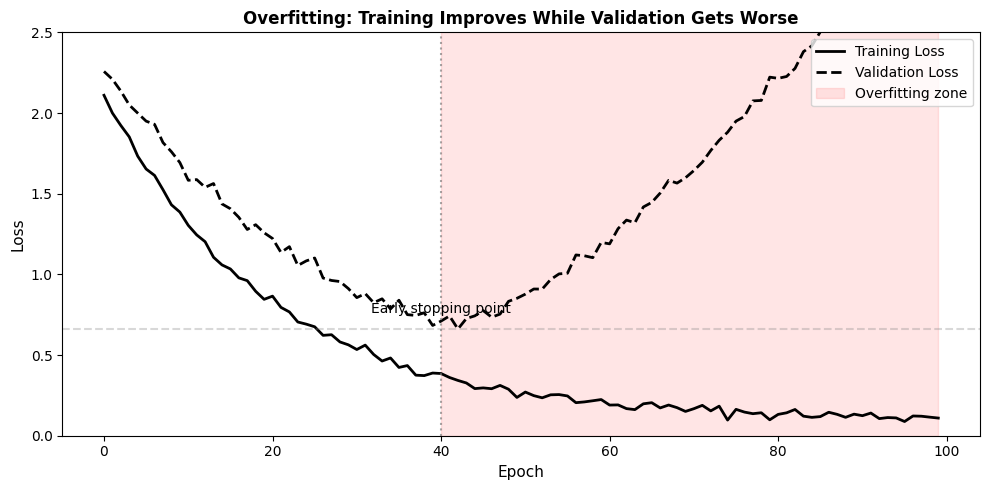

The Overfitting Problem
Best validation loss: 0.661 (epoch 42)
Final validation loss: 3.311 (epoch 100)
Final training loss: 0.109

After epoch 40, training loss keeps dropping but validation
loss rises. The model memorizes training data instead of
learning patterns that generalize to new data.


In [ ]:
# | overfitting-demo inline
# Overfitting: When memorization beats learning
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
epochs = 100

# Training loss: keeps decreasing (the model is memorizing)
train_loss = 2.0 * np.exp(-0.05 * np.arange(epochs)) + 0.1 + np.random.randn(epochs) * 0.02

# Validation loss: decreases then INCREASES (overfitting!)
val_loss = 2.0 * np.exp(-0.04 * np.arange(epochs)) + 0.3
val_loss[40:] += 0.015 * (np.arange(60) ** 1.3)  # Starts rising after epoch 40
val_loss += np.random.randn(epochs) * 0.03

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_loss, 'k-', linewidth=2, label='Training Loss')
ax.plot(val_loss, 'k--', linewidth=2, label='Validation Loss')
ax.axvline(x=40, color='gray', linestyle=':', alpha=0.7)
ax.axhline(y=min(val_loss), color='gray', linestyle='--', alpha=0.3)
ax.annotate('Early stopping point', (40, min(val_loss) + 0.1), fontsize=10, ha='center')
ax.fill_between(range(40, 100), 0, 3, alpha=0.1, color='red', label='Overfitting zone')
ax.set_xlabel('Epoch', fontsize=11)
ax.set_ylabel('Loss', fontsize=11)
ax.set_title('Overfitting: Training Improves While Validation Gets Worse', fontweight='bold')
ax.legend(loc='upper right')
ax.set_ylim(0, 2.5)
plt.tight_layout()
plt.show()

print('The Overfitting Problem')
print('=' * 50)
print(f'Best validation loss: {min(val_loss):.3f} (epoch {np.argmin(val_loss)})')
print(f'Final validation loss: {val_loss[-1]:.3f} (epoch 100)')
print(f'Final training loss: {train_loss[-1]:.3f}')
print()
print('After epoch 40, training loss keeps dropping but validation')
print('loss rises. The model memorizes training data instead of')
print('learning patterns that generalize to new data.')

In [ ]:
# | dropout-demo inline
# Dropout: Random resilience during training
import torch
import torch.nn as nn

# Create a simple layer with dropout
dropout_rate = 0.5
dropout = nn.Dropout(p=dropout_rate)

# Example activations from a hidden layer
torch.manual_seed(42)
activations = torch.tensor([0.8, 1.2, 0.3, 0.9, 1.5, 0.2, 0.7, 1.1])

print('Dropout: Randomly Disabling Neurons')
print('=' * 50)
print(f'Original activations: {activations.tolist()}')
print(f'Dropout rate: {dropout_rate} (50% chance each neuron is zeroed)')
print()

# Apply dropout (training mode)
dropout.train()
print('During TRAINING (dropout active):')
for i in range(3):
    dropped = dropout(activations)
    mask = (dropped != 0).int().tolist()
    print(f'  Trial {i+1}: {dropped.tolist()}')
    print(f'           Mask: {mask}')
print()

# During inference (no dropout)
dropout.eval()
print('During INFERENCE (dropout disabled):')
output = dropout(activations)
print(f'  Output: {output.tolist()}')
print()
print('Key insight: dropout forces the network to not rely on any')
print('single neuron. It must spread information across many neurons,')
print('creating redundancy and improving generalization.')

Dropout: Randomly Disabling Neurons
Original activations: [0.800000011920929, 1.2000000476837158, 0.30000001192092896, 0.8999999761581421, 1.5, 0.20000000298023224, 0.699999988079071, 1.100000023841858]
Dropout rate: 0.5 (50% chance each neuron is zeroed)

During TRAINING (dropout active):
  Trial 1: [1.600000023841858, 2.4000000953674316, 0.6000000238418579, 1.7999999523162842, 0.0, 0.4000000059604645, 0.0, 0.0]
           Mask: [1, 1, 1, 1, 0, 1, 0, 0]
  Trial 2: [1.600000023841858, 2.4000000953674316, 0.6000000238418579, 1.7999999523162842, 0.0, 0.0, 1.399999976158142, 0.0]
           Mask: [1, 1, 1, 1, 0, 0, 1, 0]
  Trial 3: [1.600000023841858, 0.0, 0.0, 1.7999999523162842, 3.0, 0.0, 1.399999976158142, 2.200000047683716]
           Mask: [1, 0, 0, 1, 1, 0, 1, 1]

During INFERENCE (dropout disabled):
  Output: [0.800000011920929, 1.2000000476837158, 0.30000001192092896, 0.8999999761581421, 1.5, 0.20000000298023224, 0.699999988079071, 1.100000023841858]

Key insight: dropout forces t

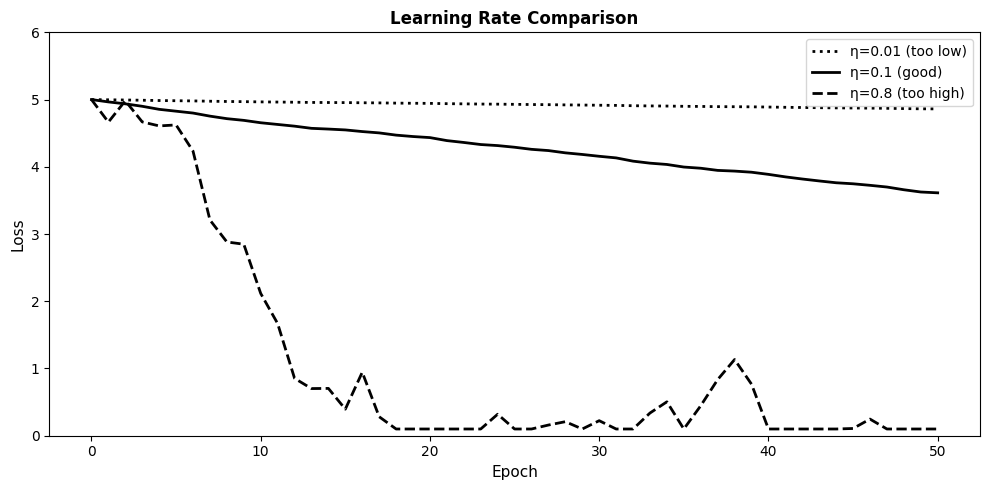

Learning Rate Effects
Too LOW (η=0.01):  Slow convergence, may never reach optimum
Just RIGHT (η=0.1): Fast convergence, stable training
Too HIGH (η=0.8):  Overshoots, oscillates, may diverge

Finding the right learning rate is crucial. Modern optimizers
like Adam adapt the learning rate during training.


In [ ]:
# | learning-rate-demo inline
# Learning rate: The step size dilemma
import numpy as np
import matplotlib.pyplot as plt

def simulate_training(lr, epochs=50):
    """Simulate gradient descent on a simple convex loss"""
    np.random.seed(42)
    loss = 5.0  # Starting loss
    history = [loss]
    
    for _ in range(epochs):
        gradient = 0.3 + np.random.randn() * 0.1  # Noisy gradient
        loss = loss - lr * gradient
        if lr > 0.5:  # High LR causes oscillation
            loss += lr * 0.5 * np.random.randn()
        loss = max(0.1, loss)  # Floor
        history.append(loss)
    
    return history

# Compare three learning rates
lrs = {'η=0.01 (too low)': 0.01, 'η=0.1 (good)': 0.1, 'η=0.8 (too high)': 0.8}
styles = ['k:', 'k-', 'k--']

fig, ax = plt.subplots(figsize=(10, 5))
for (name, lr), style in zip(lrs.items(), styles):
    history = simulate_training(lr)
    ax.plot(history, style, linewidth=2, label=name)

ax.set_xlabel('Epoch', fontsize=11)
ax.set_ylabel('Loss', fontsize=11)
ax.set_title('Learning Rate Comparison', fontweight='bold')
ax.legend()
ax.set_ylim(0, 6)
plt.tight_layout()
plt.show()

print('Learning Rate Effects')
print('=' * 50)
print('Too LOW (η=0.01):  Slow convergence, may never reach optimum')
print('Just RIGHT (η=0.1): Fast convergence, stable training')
print('Too HIGH (η=0.8):  Overshoots, oscillates, may diverge')
print()
print('Finding the right learning rate is crucial. Modern optimizers')
print('like Adam adapt the learning rate during training.')

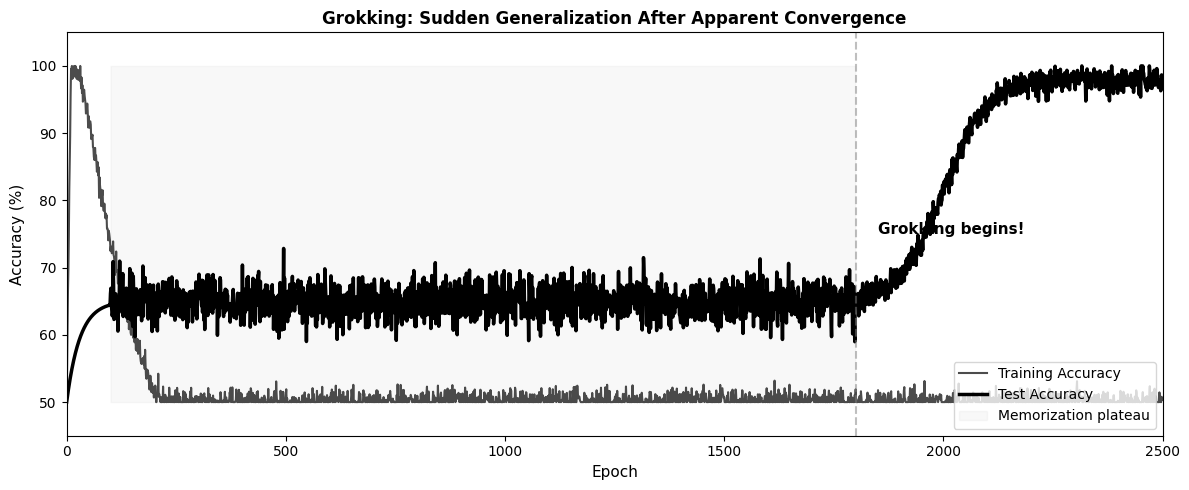

The Grokking Phenomenon
Epochs 0-100:     Initial learning
Epochs 100-1800:  Training at 100%, test stuck at ~65% (memorization)
Epochs 1800-2500: SUDDEN jump to 98% test accuracy!

The network appears converged for 1700 epochs, then suddenly
"groks" and generalizes. This suggests internal restructuring
happens even when loss appears flat.


In [ ]:
# | grokking-demo visualization inline
# Grokking: Delayed generalization
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
epochs = 2500

# Training accuracy: quickly reaches ~100% (memorization)
train_acc = np.clip(1 - 0.9 * np.exp(-epochs * 0.05 / np.arange(1, epochs+1)), 0.5, 1.0)
train_acc[:10] = 0.5 + 0.5 * np.arange(10) / 10
train_acc = train_acc + np.random.randn(epochs) * 0.01
train_acc = np.clip(train_acc, 0.5, 1.0)

# Test accuracy: flat for a LONG time, then suddenly jumps (grokking!)
test_acc = np.ones(epochs) * 0.5  # Random chance for a while
# Gradual improvement early on
test_acc[:100] = 0.5 + 0.15 * (1 - np.exp(-np.arange(100) / 30))
# Flat memorization phase
test_acc[100:1800] = 0.65 + np.random.randn(1700) * 0.02
# GROKKING: sudden jump to high accuracy
grok_start = 1800
grok_curve = 0.65 + 0.33 / (1 + np.exp(-0.02 * (np.arange(epochs - grok_start) - 200)))
test_acc[grok_start:] = grok_curve + np.random.randn(epochs - grok_start) * 0.01
test_acc = np.clip(test_acc, 0.5, 1.0)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(train_acc * 100, 'k-', linewidth=1.5, label='Training Accuracy', alpha=0.7)
ax.plot(test_acc * 100, 'k-', linewidth=2.5, label='Test Accuracy')
ax.axvline(x=grok_start, color='gray', linestyle='--', alpha=0.5)
ax.annotate('Grokking begins!', (grok_start + 50, 75), fontsize=11, fontweight='bold')
ax.fill_between(range(100, grok_start), 50, 100, alpha=0.05, color='gray', label='Memorization plateau')
ax.set_xlabel('Epoch', fontsize=11)
ax.set_ylabel('Accuracy (%)', fontsize=11)
ax.set_title('Grokking: Sudden Generalization After Apparent Convergence', fontweight='bold')
ax.legend(loc='lower right')
ax.set_ylim(45, 105)
ax.set_xlim(0, epochs)
plt.tight_layout()
plt.show()

print('The Grokking Phenomenon')
print('=' * 50)
print('Epochs 0-100:     Initial learning')
print('Epochs 100-1800:  Training at 100%, test stuck at ~65% (memorization)')
print('Epochs 1800-2500: SUDDEN jump to 98% test accuracy!')
print()
print('The network appears converged for 1700 epochs, then suddenly')
print('"groks" and generalizes. This suggests internal restructuring')
print('happens even when loss appears flat.')